In [1]:
# add repo path to the system path
from pathlib import Path
import os, sys
repo_path= Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path): # while not in the root of the repo
    repo_path = repo_path.parent #go up one level
sys.path.insert(0,str(repo_path)) if str(repo_path) not in sys.path else None

In [2]:
import cv2 as cv
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

from diffusers import DPMSolverMultistepScheduler, DiffusionPipeline
from tqdm import tqdm

from generation.inpainting.inpainter import InpaintingGenerator

/home/ricardo/miniconda3/envs/CEM-generation/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The lesion generation can be perform easily using the InpaintingGenerator class.

In [3]:
inpainter = InpaintingGenerator(saving_dir= repo_path / 'generation/inpainting/data/trial') #<-- change this
inpainter.set_generator()
inpainter.start_metadata()

/home/ricardo/miniconda3/envs/CEM-generation/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Loading pipeline components...:  67%|██████▋   | 4/6 [00:00<00:00,  5.15it/s]/home/ricardo/miniconda3/envs/CEM-generation/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  7.17it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_inpaint.StableDiffusionInpaintPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of t

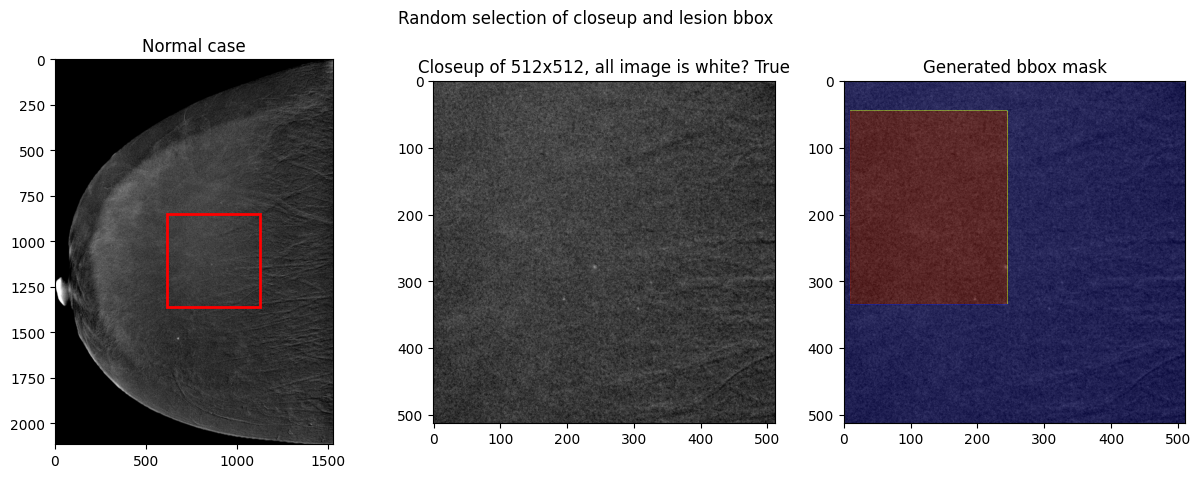

In [139]:
inpainter.current_row = inpainter.metadata.iloc[25]
inpainter.select_lesion_patch_and_bbox()
inpainter.show_current_patch_and_bbox()

100%|██████████| 24/24 [00:02<00:00,  8.30it/s]


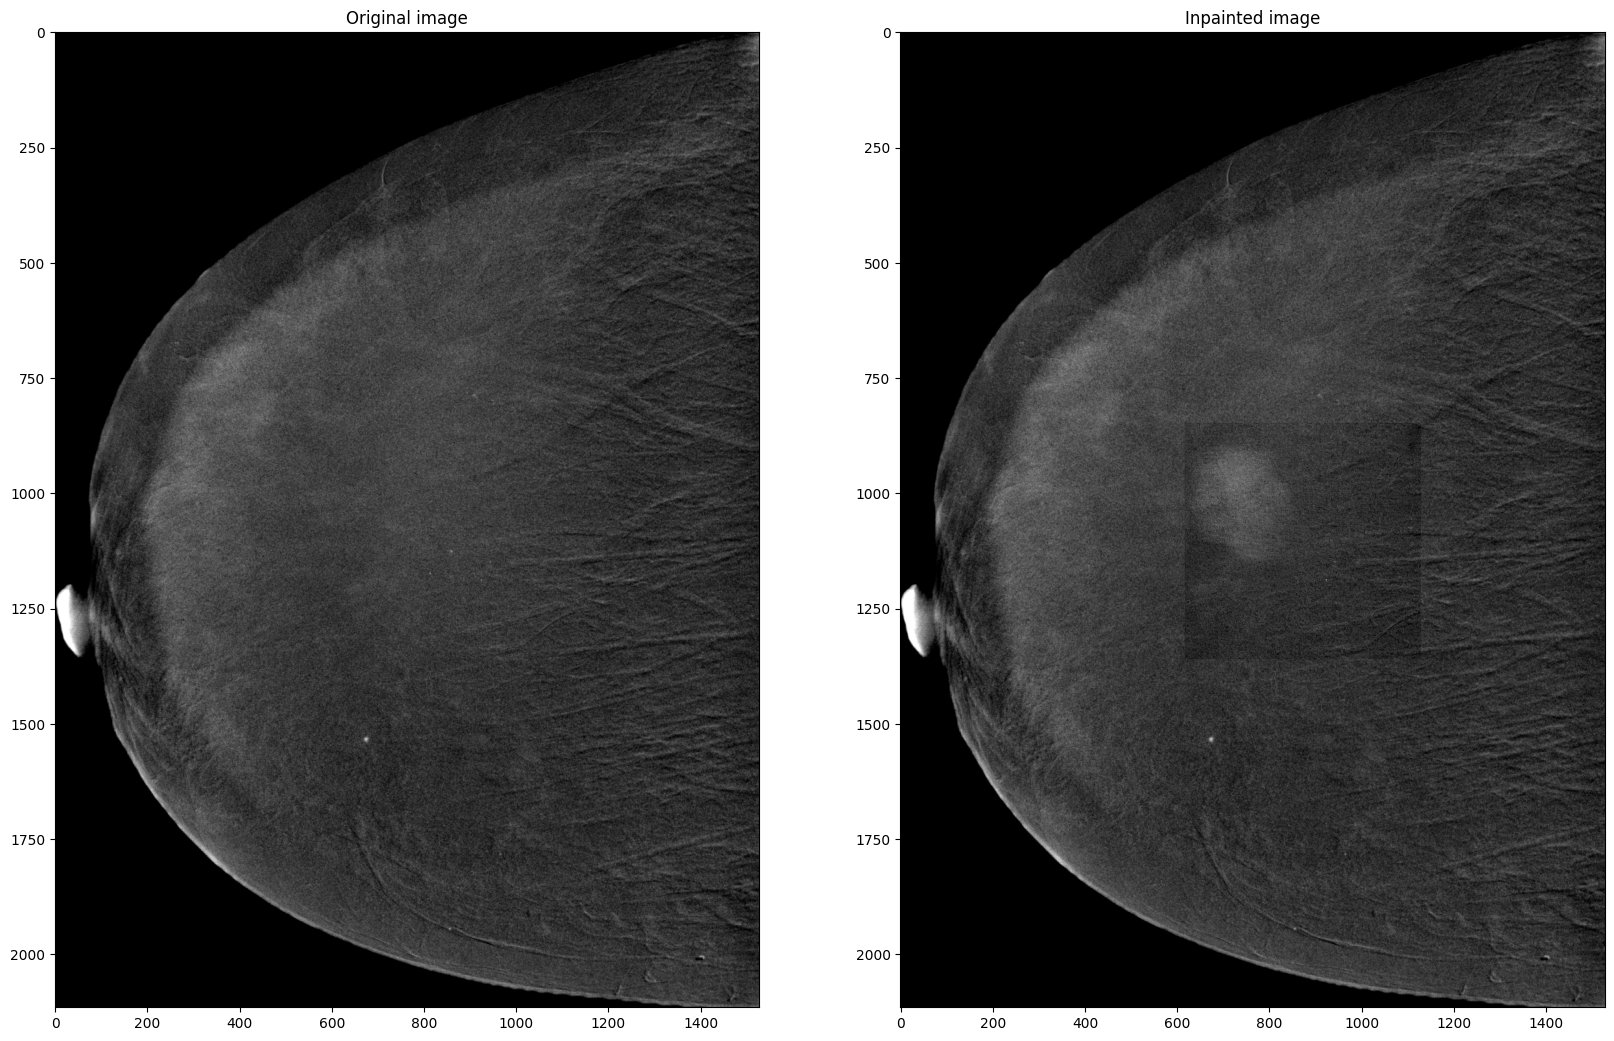

In [148]:
inpainter.synthesize_lesion(diffusion_steps=24, guidance_scale=2, seed=10, median_corr=False)
inpainter.show_synthetic_inpainting(figsize=(20, 15), histogram=False)

In [151]:
inpainter.save_synthetic_inpainting()

100%|██████████| 24/24 [00:02<00:00,  8.29it/s]


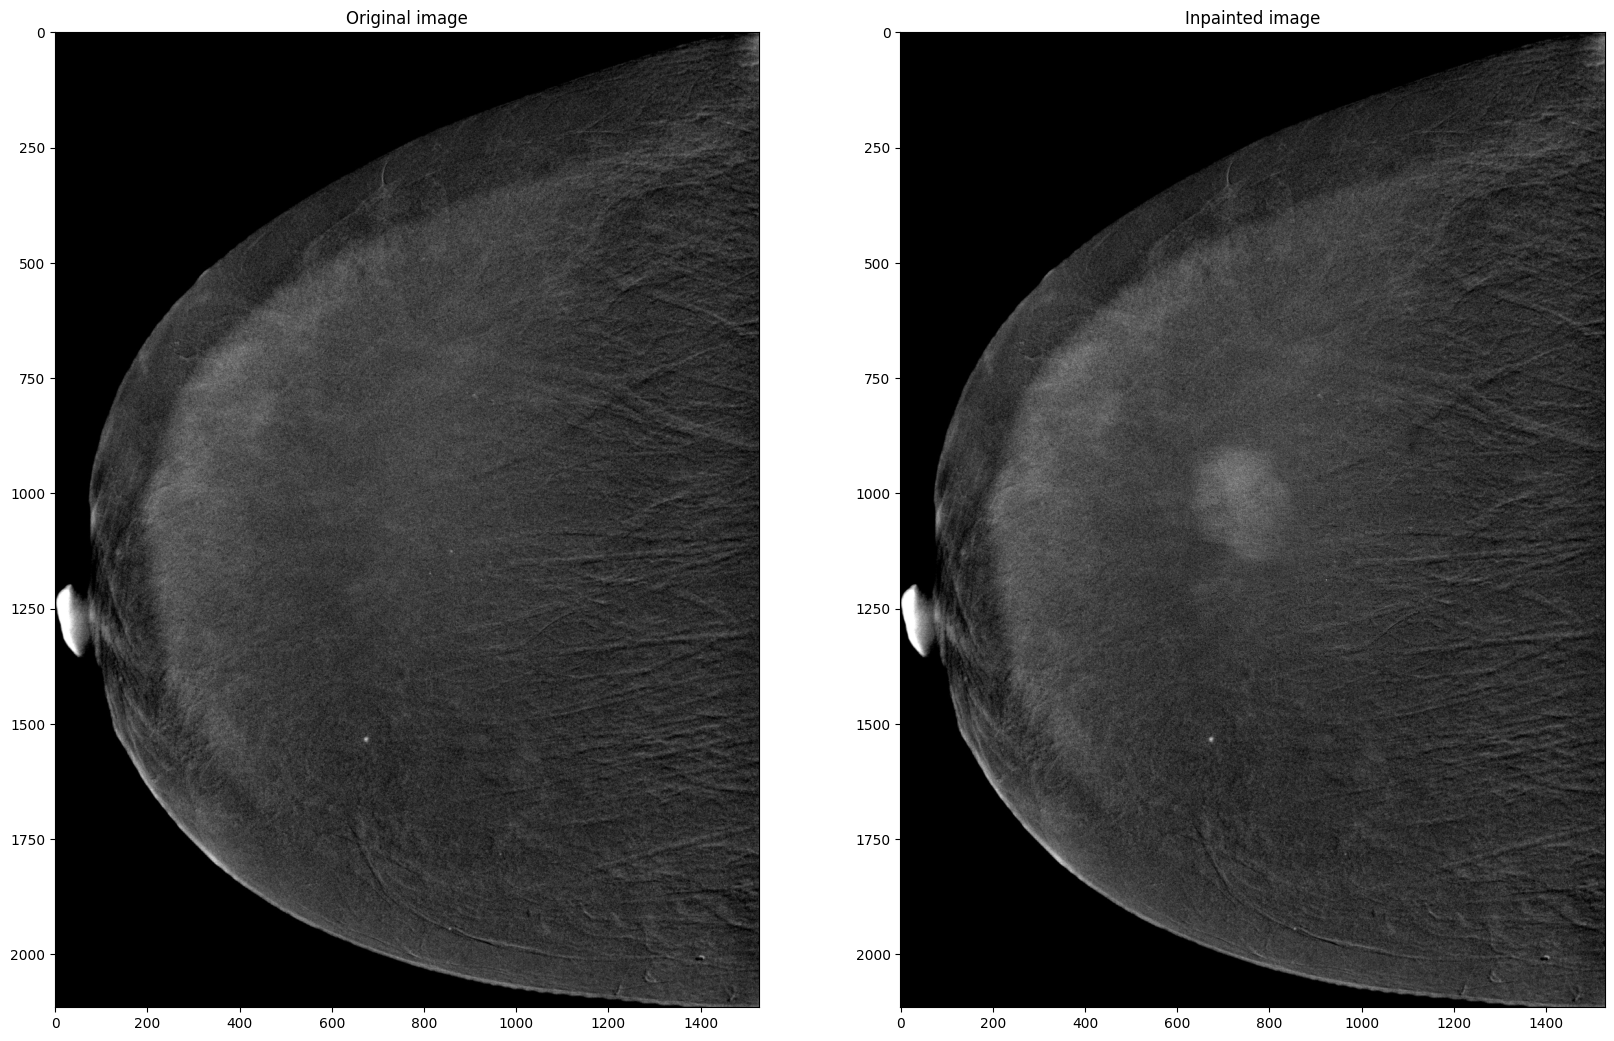

In [150]:
inpainter.synthesize_lesion(diffusion_steps=24, guidance_scale=2, seed=10)
inpainter.show_synthetic_inpainting(figsize=(20, 15), histogram=False)